# <font color=blue> Project 1   |    Abdulbaset ALZHRANI 
</font>


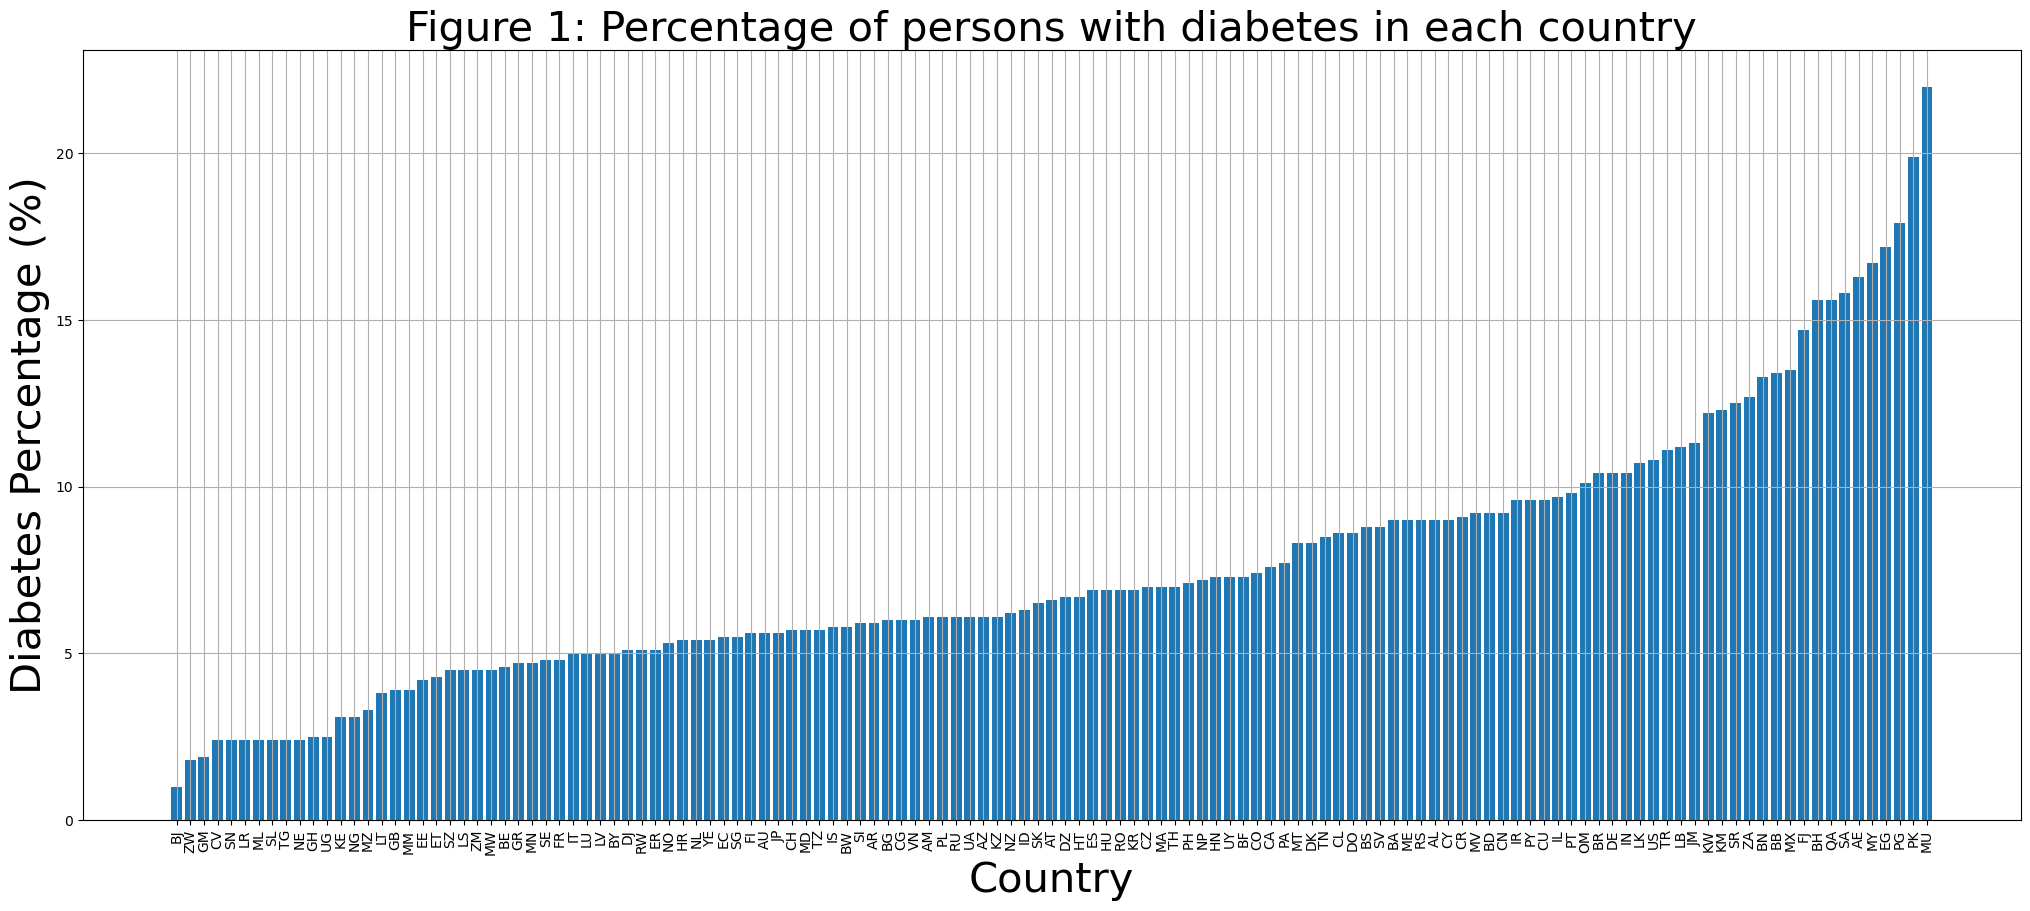

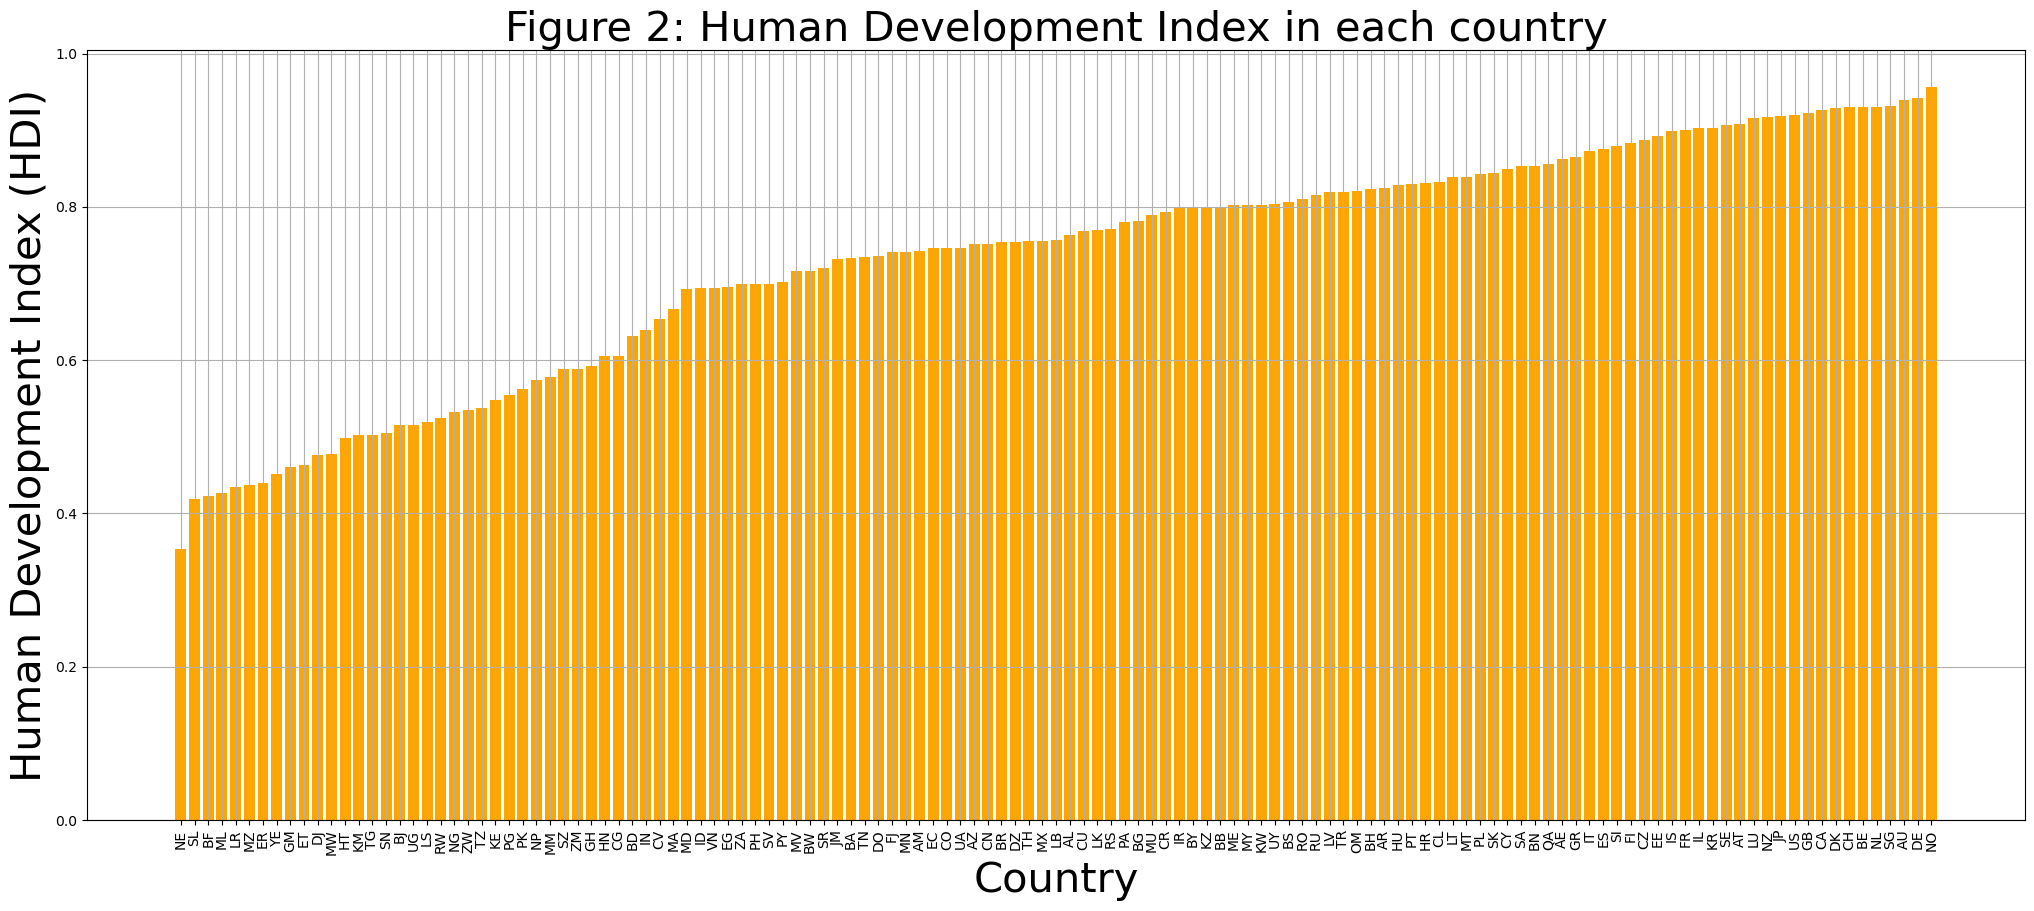

The table below shows the countries' key:


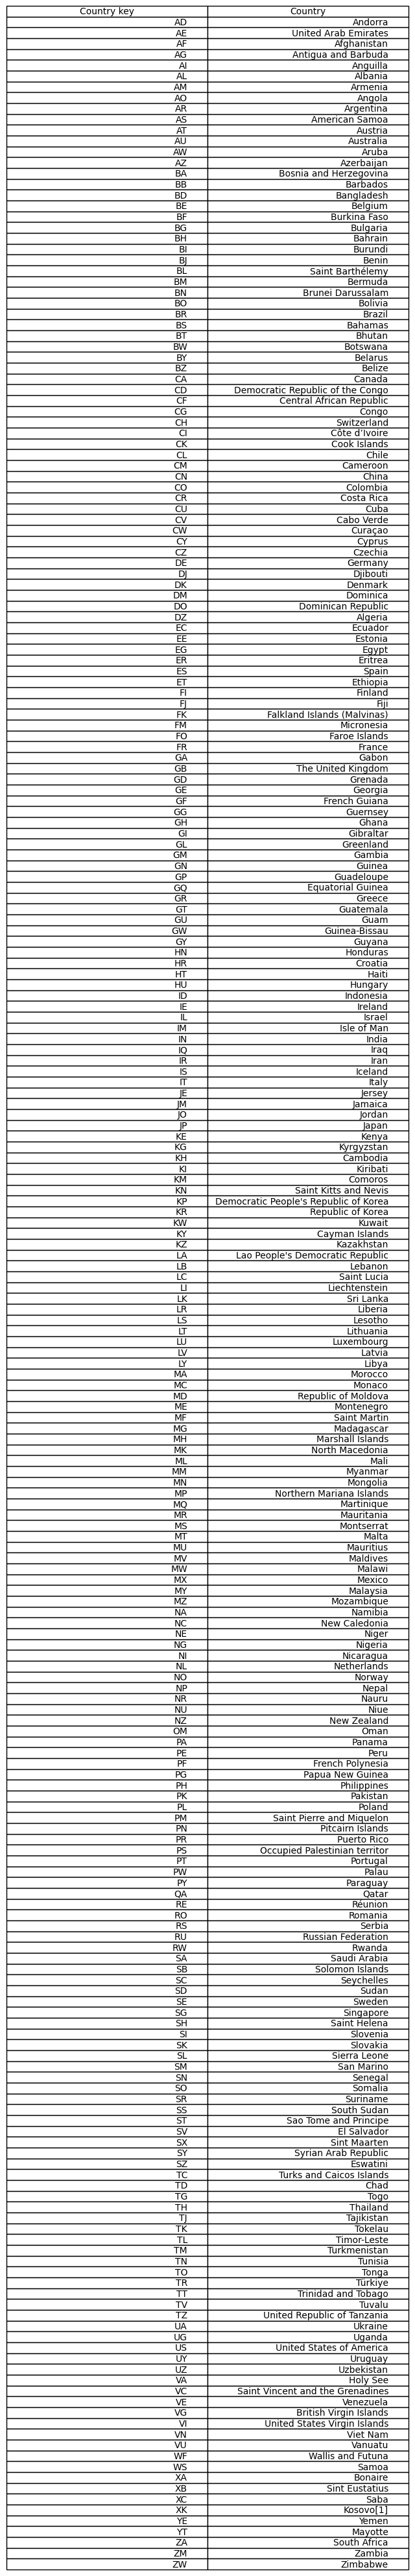

In [20]:

import csv
import matplotlib.pyplot as plt

with open('Project1Data.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    countries = []
    Di = []
    HDI = [] 
    for row in reader:
        countries.append(row[0])
        Di.append(float(row[10]))
        HDI.append(float(row[6])) 

    # Bar plot for Percentage of diabetes
    fig, ax = plt.subplots(figsize=(25, 10)) 
    sorted_data = sorted(zip(countries, Di), key=lambda x: x[1])
    countries_sorted, Di_sorted = zip(*sorted_data)
    ax.bar(countries_sorted, Di_sorted)
    ax.set_title('Figure 1: Percentage of persons with diabetes in each country', fontsize=30)
    ax.set_xlabel('Country', fontsize=30)
    ax.set_ylabel('Diabetes Percentage (%)', fontsize=30)
    ax.grid(True)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
    plt.show()

    # Bar plot for Human Development Index (HDI)
    fig, ax = plt.subplots(figsize=(25, 10)) 
    sorted_data = sorted(zip(countries, HDI), key=lambda x: x[1])
    countries_sorted, HDI_sorted = zip(*sorted_data)
    ax.bar(countries_sorted, HDI_sorted, color='orange')
    ax.set_title('Figure 2: Human Development Index in each country', fontsize=30)
    ax.set_xlabel('Country', fontsize=30)
    ax.set_ylabel('Human Development Index (HDI)', fontsize=30)
    ax.grid(True)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
    plt.show()


print("The table below shows the countries' key:")

with open('Country_Key_Index.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    Country_key = []
    Country = []
    for row in reader:
        Country_key.append(row[0])
        Country.append(row[1])
        
    
    fig, ax = plt.subplots(figsize=(8, 3))
    ax.axis('off')
    table_data = [[c, p] for c, p in zip(Country_key, Country)]
    table = ax.table(cellText=table_data, colLabels=['Country key', 'Country'], loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)    
    plt.show()


### ---

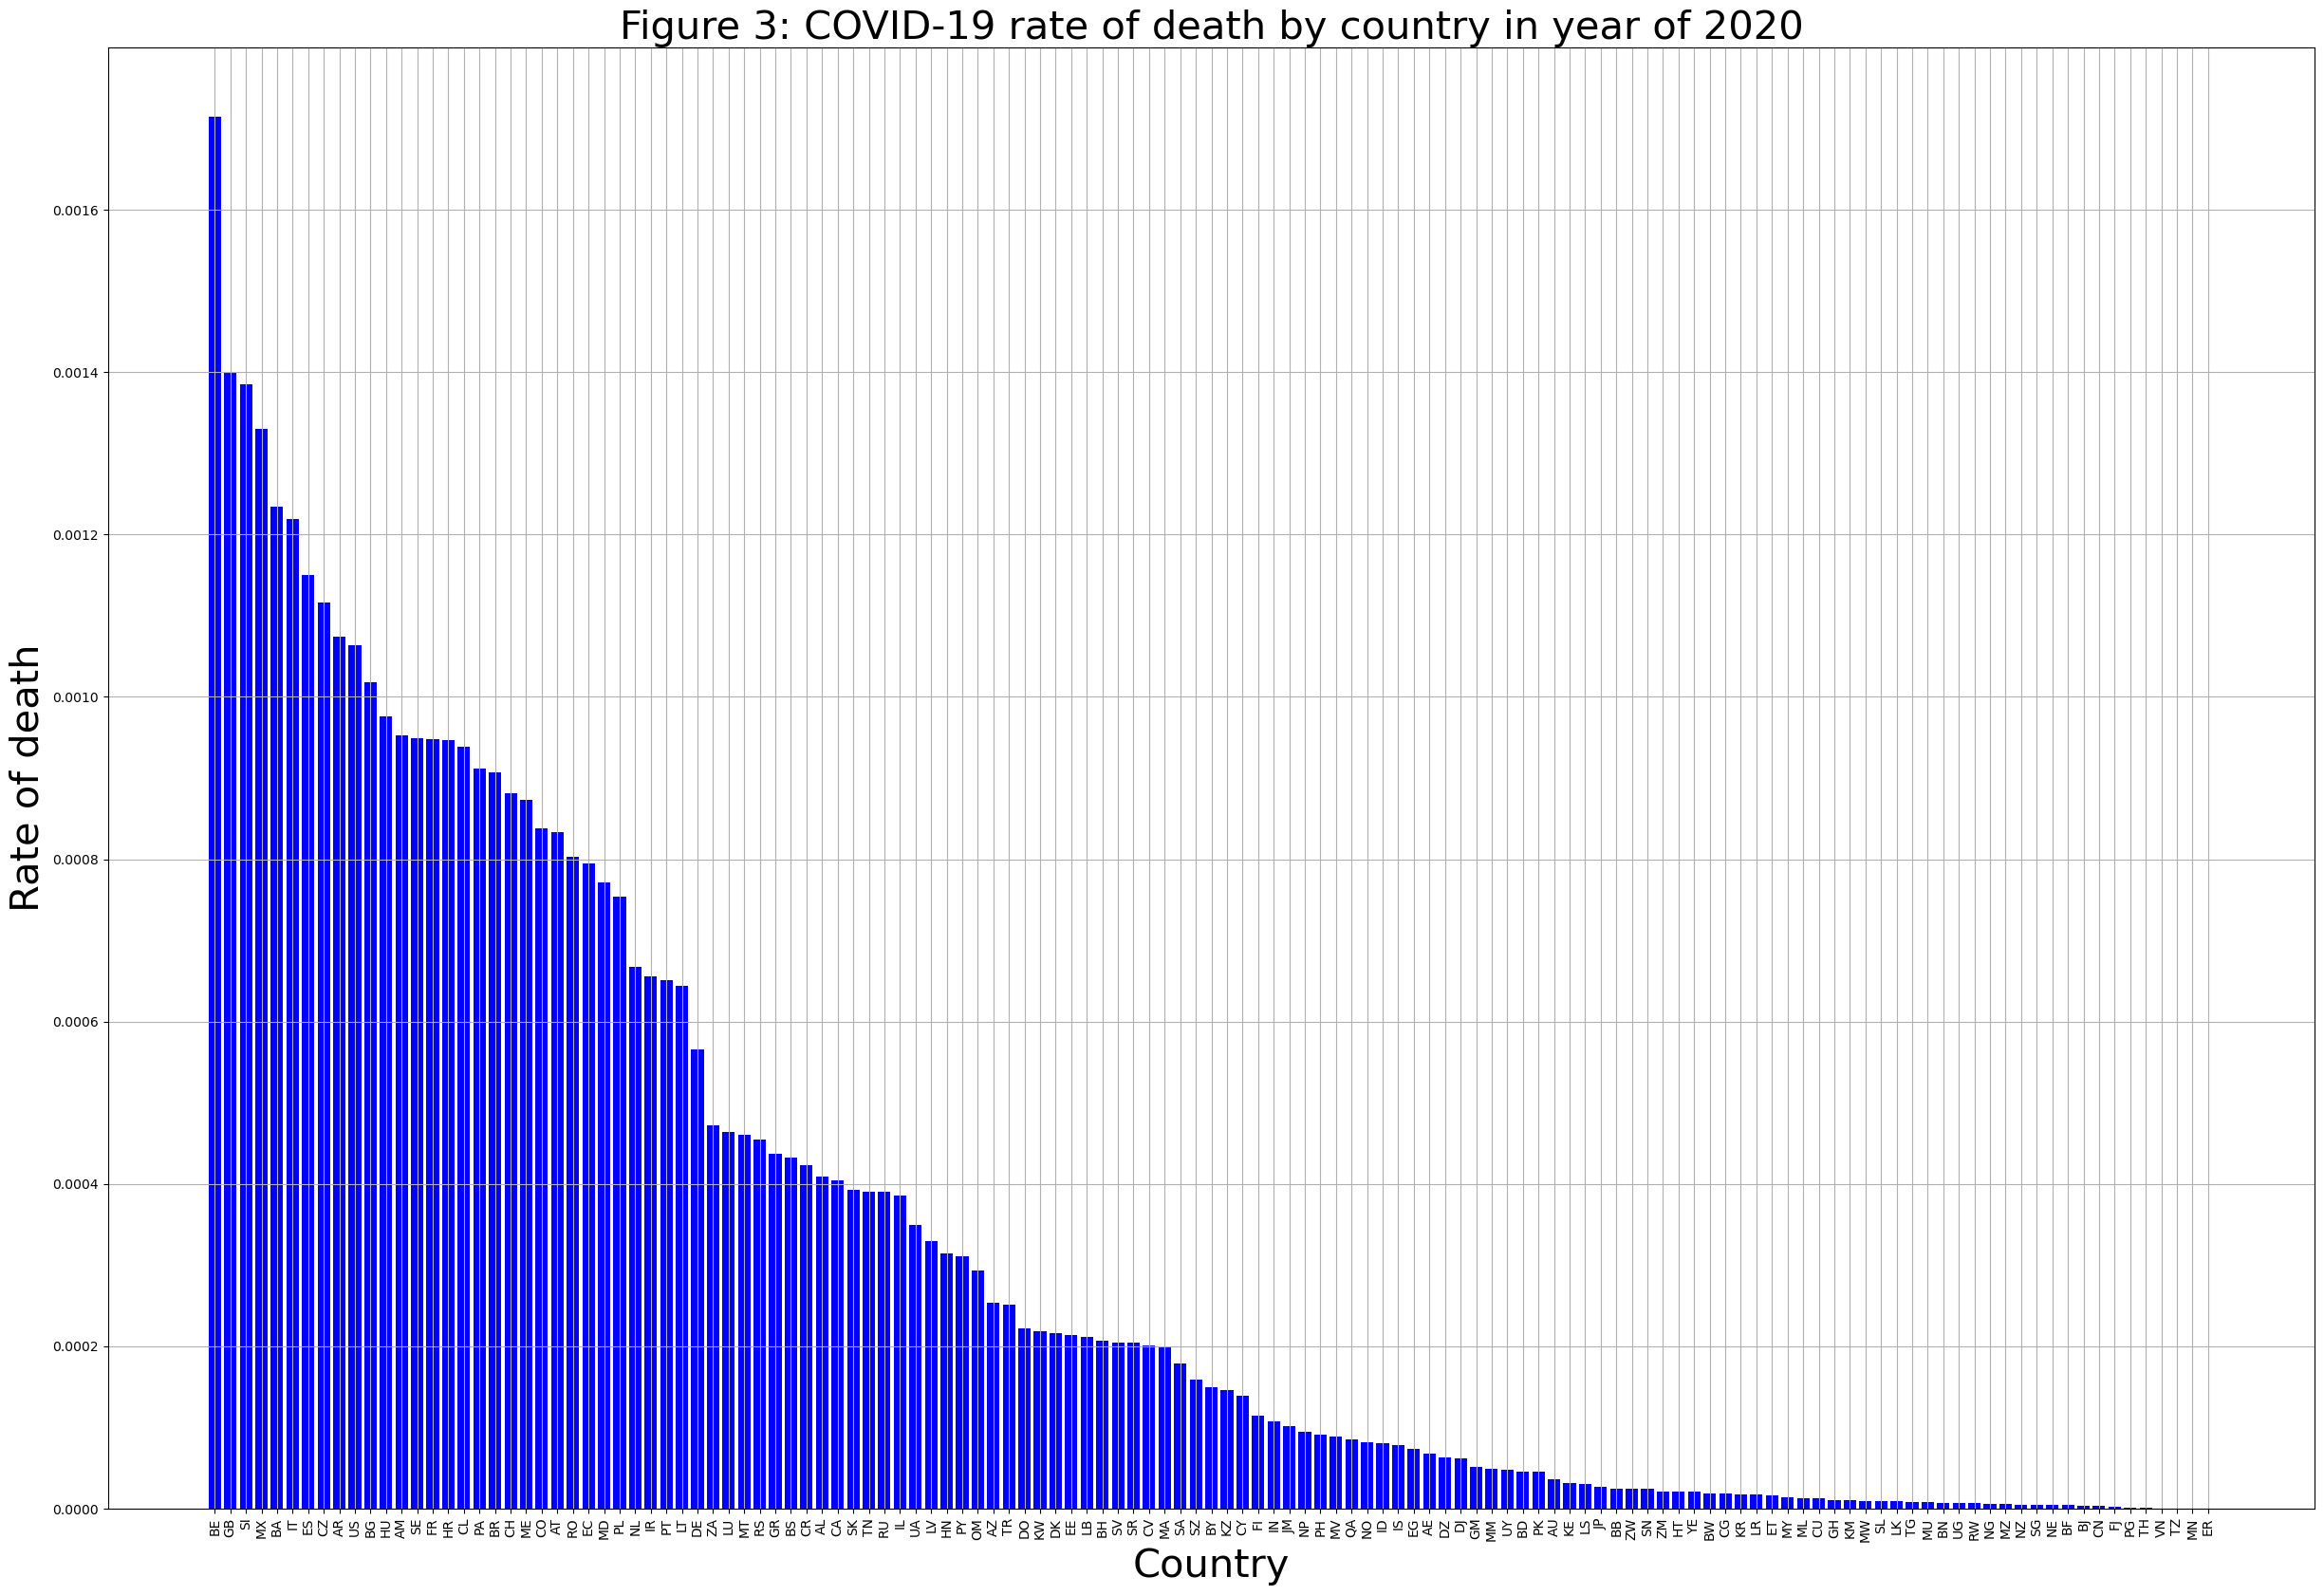

In [21]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Project1Data.csv', encoding='ISO-8859-1')

max_death = df.groupby('Country key')['Rate of death'].max().reset_index()
sorted_max_death = max_death.sort_values(by='Rate of death', ascending=False)

fig, ax = plt.subplots(figsize=(30, 20))
ax.bar(sorted_max_death['Country key'], sorted_max_death['Rate of death'], color='blue')

plt.xlabel('Country', fontsize=30)
plt.ylabel('Rate of death', fontsize=30)
plt.title('Figure 3: COVID-19 rate of death by country in year of 2020', fontsize=30)
plt.xticks(rotation=90, fontsize=10)
plt.grid(True)
plt.show()




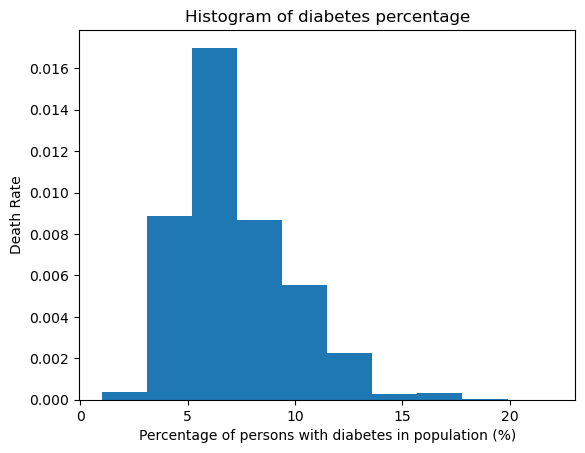

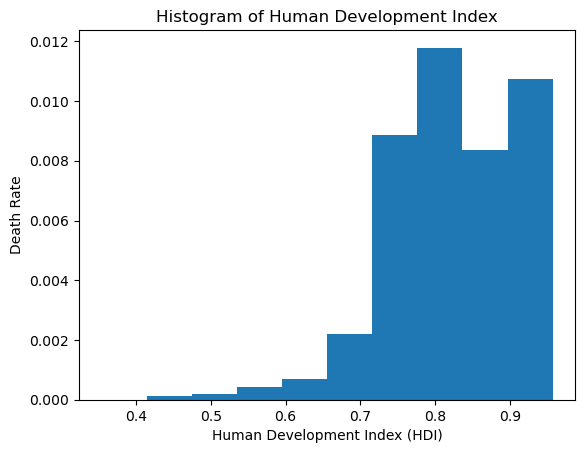

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data
data = pd.read_csv("Project1Data.csv")
DeathRate = data.iloc[:, 15] 
Di = data.iloc[:, 10] 
HDI = data.iloc[:, 6] 
DiG = data.iloc[:, 16] 
HDIG = data.iloc[:, 17] 

# Histogram of diabetes percentage
plt.hist(Di, weights=DeathRate)
plt.title("Histogram of diabetes percentage")
plt.xlabel("Percentage of persons with diabetes in population (%)")
plt.ylabel("Death Rate")
plt.show()


# Histogram of Human Development Index
plt.hist(HDI, weights=DeathRate)
plt.title("Histogram of Human Development Index")
plt.xlabel("Human Development Index (HDI)")
plt.ylabel("Death Rate")
plt.show()



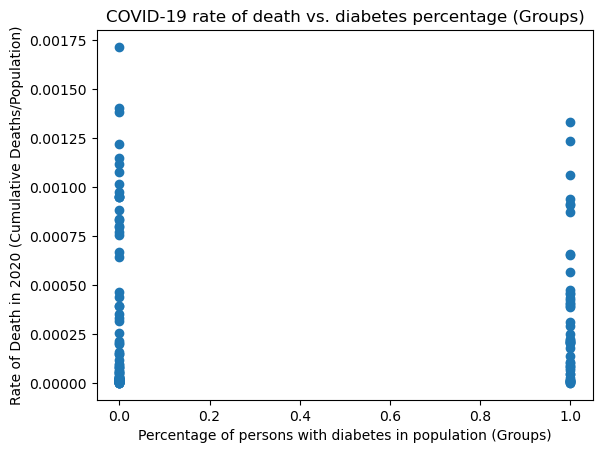

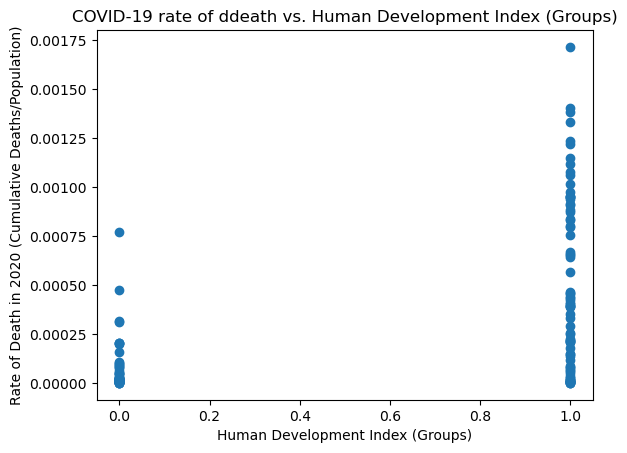

In [23]:
# Scatter plot for percentage of persons with diabetes Grouped vs. death rate
plt.scatter(DiG, DeathRate)
plt.title('COVID-19 rate of death vs. diabetes percentage (Groups)')
plt.xlabel("Percentage of persons with diabetes in population (Groups)")
plt.ylabel("Rate of Death in 2020 (Cumulative Deaths/Population)")
plt.show()

# Scatter plot for HDI Grouped vs. death rate
plt.scatter(HDIG, DeathRate)
plt.title('COVID-19 rate of ddeath vs. Human Development Index (Groups)')
plt.xlabel("Human Development Index (Groups)")
plt.ylabel("Rate of Death in 2020 (Cumulative Deaths/Population)")
plt.show()

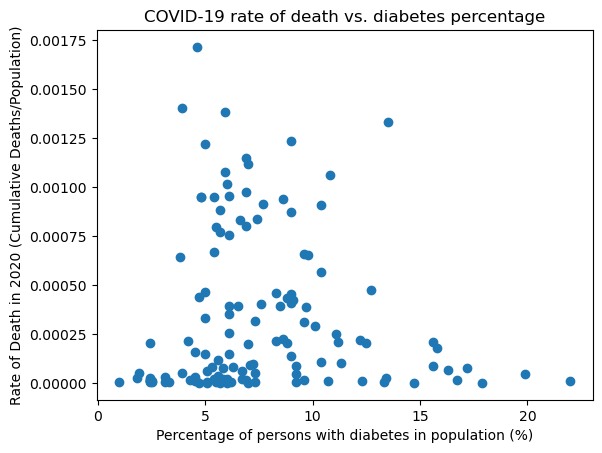

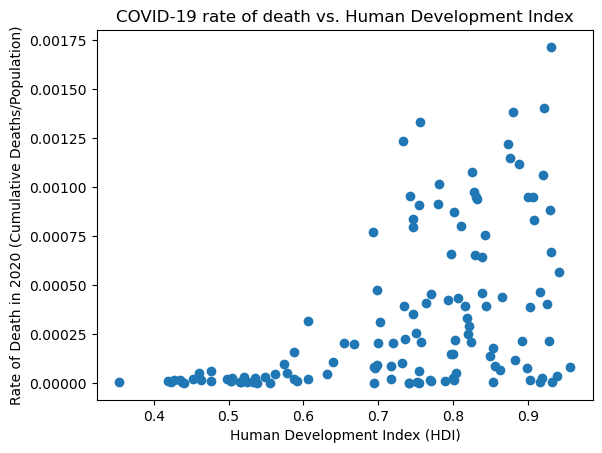

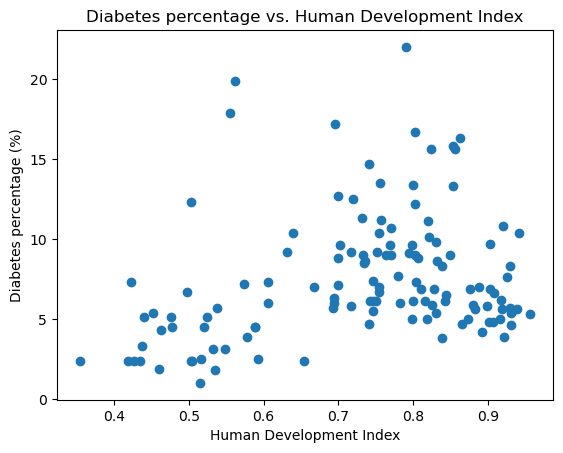

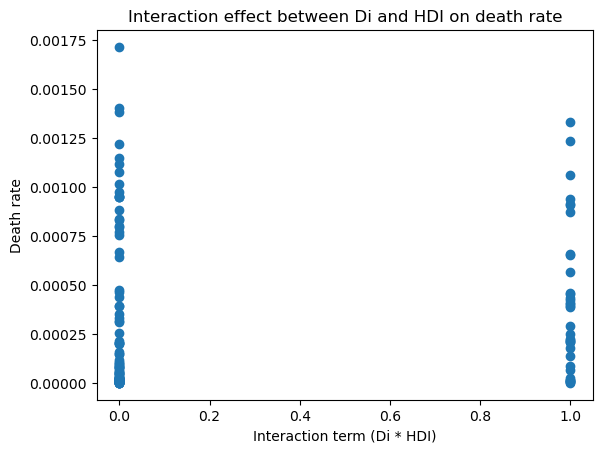

                            OLS Regression Results                            
Dep. Variable:          Rate of death   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                  0.004904
Date:                Mon, 30 Oct 2023   Prob (F-statistic):              0.944
Time:                        16:01:58   Log-Likelihood:                 824.97
No. Observations:                 129   AIC:                            -1646.
Df Residuals:                     127   BIC:                            -1640.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [26]:

import pandas as pd
import statsmodels.api as sm

# Scatter plot for percentage of persons with diabetes vs. death rate
plt.scatter(Di, DeathRate)
plt.title('COVID-19 rate of death vs. diabetes percentage')
plt.xlabel("Percentage of persons with diabetes in population (%)")
plt.ylabel("Rate of Death in 2020 (Cumulative Deaths/Population)")
plt.show()

# Scatter plot for HDI vs. death rate
plt.scatter(HDI, DeathRate)
plt.title('COVID-19 rate of death vs. Human Development Index')
plt.xlabel("Human Development Index (HDI)")
plt.ylabel("Rate of Death in 2020 (Cumulative Deaths/Population)")
plt.show()

plt.scatter(HDI, Di)
plt.title('Diabetes percentage vs. Human Development Index')
plt.xlabel("Human Development Index")
plt.ylabel("Diabetes percentage (%)")
plt.show()

interaction = DiG * HDIG

# Create scatter plot for interaction vs. death rate
plt.scatter(interaction, DeathRate)
plt.xlabel("Interaction term (Di * HDI)")
plt.ylabel("Death rate")
plt.title("Interaction effect between Di and HDI on death rate")
plt.show()

X1 = sm.add_constant(pd.DataFrame({'Diabetes percentage (Grouped)': DiG}))
model1 = sm.OLS(DeathRate, X1).fit()
print(model1.summary())

X2 = sm.add_constant(pd.DataFrame({'HDI (Grouped)': HDIG}))
model2 = sm.OLS(DeathRate, X2).fit()
print(model2.summary())

X = sm.add_constant(pd.DataFrame({'Diabetes percentage (Grouped)': DiG, 'HDI (Grouped)': HDIG, 'interaction': interaction}))
model = sm.OLS(DeathRate, X).fit()
print(model.summary())


### conclusion

Based on the OLS regression analysis, it can be concluded that HDI has a significant positive impact on COVID-19 death cases, while Diabetes Percentage does not have a significant impact. When both variables are considered together, HDI still has a significant positive impact, but the impact of Diabetes Percentage becomes even less significant. The interaction between Diabetes Percentage and HDI also has a negative impact on COVID-19 death cases, but it is not significant at the conventional level (p-value=0.075). Therefore, it can be concluded that higher levels of HDI are associated with lower COVID-19 death cases, while the impact of Diabetes Percentage is not significant in explaining the variation in COVID-19 death cases.

It is important to note that the accuracy and reliability of the data used in the analysis can significantly impact the findings and conclusions drawn from the study. In cases where there are insufficient or poor-quality data, it may be necessary to rely on estimates or models, which can introduce additional uncertainty and potential bias.

Also, in this study, diabetes was considered as one factor, and there are two types of diabetes. It is crucial to consider that type 1 and type 2 diabetes have distinct pathophysiological mechanisms, clinical features, and risk factors.

In conclusion, while the analysis presented in the study provides some insights into the potential association of diabetes and HDI with COVID-19 death rates, further research is needed to investigate the complex relationships between these factors and the disease. Careful consideration of data quality, potential biases, and confounding factors is crucial to ensure the validity and reliability of the findings.

### Recommendation
There are also other parameters that can be considered in order to improve this study. For example, older age is a well-established risk factor for severe COVID-19 disease and death. Obesity is another well-established risk factor for severe COVID-19 disease and death. Furthermore, several genetic variants have been identified that may contribute to the risk of severe COVID-19 disease instead of lifestyle. For instance, variants in the ACE2 and TMPRSS2 genes have been shown to be associated with increased susceptibility to COVID-19. Also, studying each type of diabetes separately can provide valuable insights into the impact of diabetes on COVID-19 outcomes.
